In [1]:
import numpy as np
import tensorflow as tf

from env import *
from DataLoader import DataLoader
from AttGan import AttGan

In [2]:
dloader = DataLoader(BATCH_SIZE)
dloader.build()

model = AttGan(eta=ETA, num_att=dloader.num_att)
model.build()

tf.summary.FileWriter("./logdir/", graph=model.graph)

for e in range(EPOCHS):
    train_loss_g = 0.0
    train_loss_d = 0.0
    
    for X_src, X_att_a, X_att_b in dloader.next_batch():
        loss_g, loss_d = model.step(X_src, X_att_a, X_att_b)
        train_loss_g += loss_g
        train_loss_d += loss_d
        
    train_loss_g /= len(dloader)
    train_loss_d /= len(dloader)
    
    print(f"Epochs {e+1}/{EPOCHS}")
    print(f"Train generator loss: {train_loss_g:.8f}")
    print(f"Train discriminator loss: {train_loss_d:.8f}")
    
model.save("./ckpts/attgan")

W0801 18:04:17.512852 139625107182976 deprecation_wrapper.py:119] From /home/jylee/projects/attgan/AttGan.py:211: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0801 18:04:17.516580 139625107182976 deprecation_wrapper.py:119] From /home/jylee/projects/attgan/AttGan.py:153: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



Number of images: 16
Number of attributes: 1
Number of batches: 1
Building Attgan...


W0801 18:04:17.714073 139625107182976 deprecation_wrapper.py:119] From /home/jylee/projects/attgan/AttGan.py:41: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.



Building generator...
Generator was built.
Building discriminator...


W0801 18:04:18.169089 139625107182976 deprecation.py:323] From /home/jylee/.conda/envs/tf1env/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Discriminator was built.


W0801 18:04:22.709266 139625107182976 deprecation_wrapper.py:119] From /home/jylee/projects/attgan/AttGan.py:93: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0801 18:04:24.758515 139625107182976 deprecation_wrapper.py:119] From /home/jylee/projects/attgan/AttGan.py:94: The name tf.global_variables_initializer is deprecated. Please use tf.compat.v1.global_variables_initializer instead.

W0801 18:04:25.897728 139625107182976 deprecation_wrapper.py:119] From /home/jylee/projects/attgan/AttGan.py:96: The name tf.train.Saver is deprecated. Please use tf.compat.v1.train.Saver instead.



Attgan was built.
Epochs 1/1000
Train generator loss: 54.26301956
Train discriminator loss: 5.91150188
Epochs 2/1000
Train generator loss: 45.62518692
Train discriminator loss: 5.60156298
Epochs 3/1000
Train generator loss: 37.56270599
Train discriminator loss: 5.37173080
Epochs 4/1000
Train generator loss: 34.79808044
Train discriminator loss: 5.58338547
Epochs 5/1000
Train generator loss: 32.70788956
Train discriminator loss: 5.44033384
Epochs 6/1000
Train generator loss: 31.50951767
Train discriminator loss: 5.44930315
Epochs 7/1000
Train generator loss: 31.50474167
Train discriminator loss: 5.44986439
Epochs 8/1000
Train generator loss: 31.50199890
Train discriminator loss: 5.47303629
Epochs 9/1000
Train generator loss: 31.45815468
Train discriminator loss: 5.49776125
Epochs 10/1000
Train generator loss: 30.54602432
Train discriminator loss: 5.74705124
Epochs 11/1000
Train generator loss: 28.95207214
Train discriminator loss: 5.74931335
Epochs 12/1000
Train generator loss: 28.93982

In [3]:
import cv2
import matplotlib.pyplot as plt

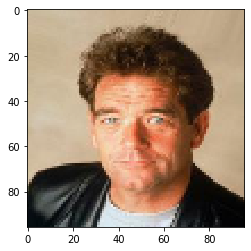

In [4]:
img = cv2.imread("data_sample_/img_align_celeba/000052.jpg")
img = cv2.resize(img, dsize=(96, 96)).astype(np.float32)

img = (img - 128) / 128

img_src = cv2.cvtColor((img + 1)/2, cv2.COLOR_BGR2RGB)
plt.imshow(img_src)

In [5]:
img

array([[[ 0.2265625,  0.453125 ,  0.5703125],
        [ 0.234375 ,  0.4609375,  0.578125 ],
        [ 0.2421875,  0.46875  ,  0.5859375],
        ...,
        [ 0.015625 ,  0.2578125,  0.4375   ],
        [ 0.0625   ,  0.3046875,  0.484375 ],
        [ 0.0625   ,  0.3046875,  0.484375 ]],

       [[ 0.234375 ,  0.4609375,  0.578125 ],
        [ 0.234375 ,  0.4609375,  0.578125 ],
        [ 0.2265625,  0.453125 ,  0.5703125],
        ...,
        [ 0.0390625,  0.28125  ,  0.453125 ],
        [ 0.0625   ,  0.3046875,  0.484375 ],
        [ 0.0625   ,  0.3046875,  0.484375 ]],

       [[ 0.2109375,  0.4296875,  0.5625   ],
        [ 0.2109375,  0.4296875,  0.5625   ],
        [ 0.21875  ,  0.4375   ,  0.5703125],
        ...,
        [ 0.0546875,  0.296875 ,  0.4765625],
        [ 0.0625   ,  0.3046875,  0.484375 ],
        [ 0.0625   ,  0.3046875,  0.484375 ]],

       ...,

       [[-0.859375 , -0.8828125, -0.9453125],
        [-0.859375 , -0.8828125, -0.9453125],
        [-0.8671875, -

In [6]:
img_converted = model.convert(img.reshape(1, *img.shape), np.ones((1, 1)))

In [7]:
img_converted.shape

(1, 96, 96, 3)

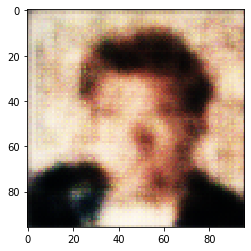

In [8]:
img_converted = cv2.cvtColor(img_converted.squeeze(), cv2.COLOR_BGR2RGB)
plt.imshow((img_converted*128 + 128)/255)

In [9]:
model.Gparams

[<tf.Variable 'attgan/params/Variable:0' shape=(5, 5, 3, 16) dtype=float32_ref>,
 <tf.Variable 'attgan/params/Variable_1:0' shape=(1, 1, 1, 16) dtype=float32_ref>,
 <tf.Variable 'attgan/params/Variable_2:0' shape=(5, 5, 16, 16) dtype=float32_ref>,
 <tf.Variable 'attgan/params/Variable_3:0' shape=(1, 1, 1, 16) dtype=float32_ref>,
 <tf.Variable 'attgan/params/Variable_4:0' shape=(5, 5, 16, 32) dtype=float32_ref>,
 <tf.Variable 'attgan/params/Variable_5:0' shape=(1, 1, 1, 32) dtype=float32_ref>,
 <tf.Variable 'attgan/params/Variable_6:0' shape=(5, 5, 32, 32) dtype=float32_ref>,
 <tf.Variable 'attgan/params/Variable_7:0' shape=(1, 1, 1, 32) dtype=float32_ref>,
 <tf.Variable 'attgan/params/Variable_8:0' shape=(5, 5, 32, 33) dtype=float32_ref>,
 <tf.Variable 'attgan/params/Variable_9:0' shape=(1, 1, 1, 32) dtype=float32_ref>,
 <tf.Variable 'attgan/params/Variable_10:0' shape=(5, 5, 16, 32) dtype=float32_ref>,
 <tf.Variable 'attgan/params/Variable_11:0' shape=(1, 1, 1, 16) dtype=float32_ref>,

In [10]:
model.X_att_b.get_shape().as_list()

[None, 1]

In [11]:
img.min()

-1.0

In [12]:
img_converted.max()

0.98720384

In [13]:
X_att_a.shape

(16, 1)

In [14]:
X_att_b.shape

(16, 1)